In [4]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tnrange

In [5]:
from Agents.DQNAgent import DQNAgent

Using TensorFlow backend.


In [6]:
%load_ext autoreload
%autoreload 2

Make the environment

In [7]:
env = gym.make('CartPole-v1')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


And the agent

In [8]:
agent = DQNAgent(env.observation_space.shape[0], 2)

In [9]:
num_episodes = 5000

Run the training Loop

In [10]:
scores = []
for e in tnrange(num_episodes):
    state = env.reset()
    for survived_time in range(500):
                # TODO Fix display on docker before rendering
                #env.render()
                action = agent.act(state)
                # make a move and go to the next frame 
                next_state, reward, done, _ = env.step(action)
                # Remember the previous state, action, reward, and done
                agent.remember(state, action, reward, next_state, done)
                # make next_state the new current state for the next frame.
                state = next_state
                # done is true only when the game ends
                if done: # Move to the next episode when done
                    #print("episode: %d/%d, score: %d" % (e, num_episodes, survived_time))
                    scores.append(survived_time)
                    break
    agent.learn(64)

In [11]:
def moving_average(a, n=1000) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

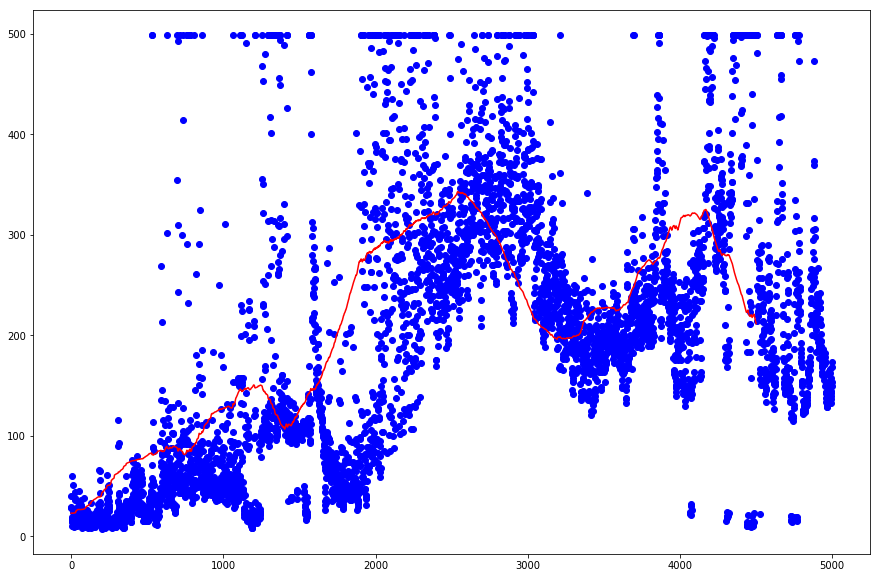

In [12]:
fig = plt.figure(figsize=(15,10))
plt.plot(scores, 'bo')
plt.plot(moving_average(scores,n=500), 'r')